In [1]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import metrics
import itertools

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.4,random_state=100)

In [6]:
clf = svm.SVC(kernel='linear',C=0.5,gamma=.1, probability = True)

In [7]:
clf.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9517543859649122


In [10]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 80   7]
 [  4 137]]


In [11]:
class_names = list(cancer.target_names)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
mtrx = metrics.confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 2)

Confusion matrix, without normalization
[[ 80   7]
 [  4 137]]


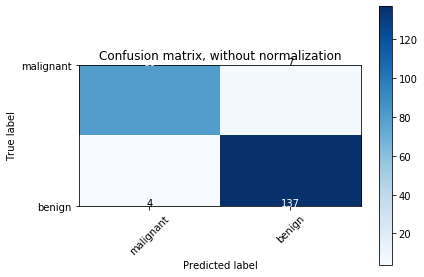

In [13]:
plt.figure()
plot_confusion_matrix(mtrx,classes=class_names,title='Confusion matrix, without normalization')


Normalized confusion matrix
[[0.92 0.08]
 [0.03 0.97]]


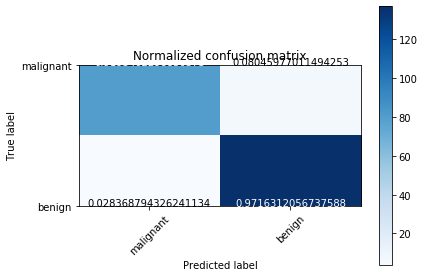

In [14]:
plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, normalize = True, title='Normalized confusion matrix')